In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=224, mask_size=224, is_deeplab=False)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, 
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
for l in model.base_layers:
    for param in l.parameters():
        param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:0


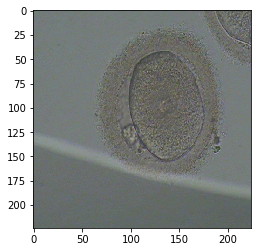

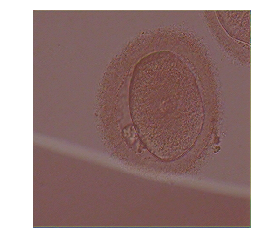

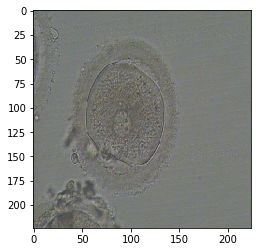

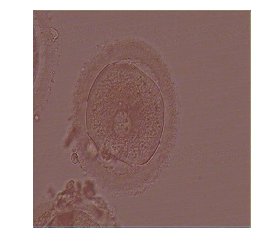

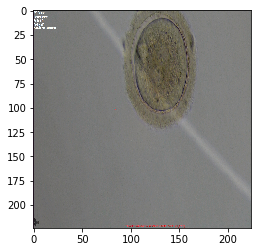

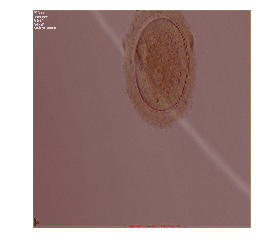

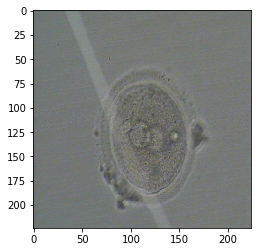

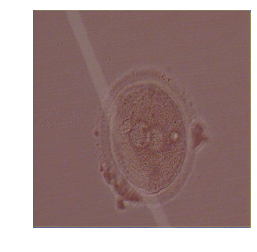

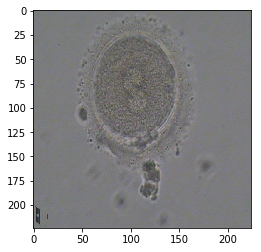

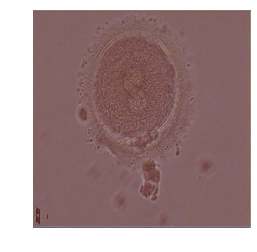

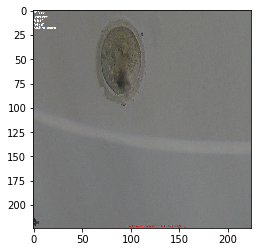

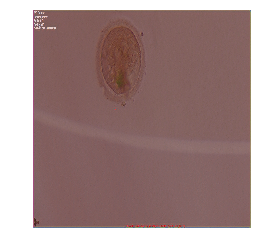

In [6]:
visualize_segmenter(model, dataloaders['val'], device)

In [7]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=20)

Epoch 0/19
----------
LR 0.001
train: iou: 0.530661, aed: 1.615385, bce: 0.316934, dice: 0.231289, loss: 0.274112
val: iou: 0.792098, aed: 0.343348, bce: 0.106813, dice: 0.086912, loss: 0.096863
saving best model
0m 26s
Epoch 1/19
----------
LR 0.001
train: iou: 0.850087, aed: 0.221154, bce: 0.076593, dice: 0.063757, loss: 0.070175
val: iou: 0.848191, aed: 0.175966, bce: 0.072823, dice: 0.061698, loss: 0.067260
saving best model
0m 25s
Epoch 2/19
----------
LR 0.001
train: iou: 0.871802, aed: 0.155769, bce: 0.063091, dice: 0.053727, loss: 0.058409
val: iou: 0.854196, aed: 0.248927, bce: 0.074908, dice: 0.058265, loss: 0.066586
saving best model
0m 25s
Epoch 3/19
----------
LR 0.001
train: iou: 0.879325, aed: 0.140385, bce: 0.060439, dice: 0.050140, loss: 0.055290
val: iou: 0.873424, aed: 0.188841, bce: 0.062093, dice: 0.051576, loss: 0.056834
saving best model
0m 25s
Epoch 4/19
----------
LR 0.001
train: iou: 0.886089, aed: 0.155769, bce: 0.054517, dice: 0.046675, loss: 0.050596
val: i

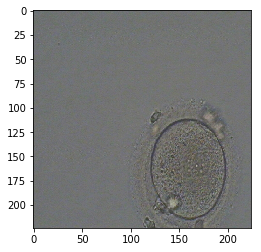

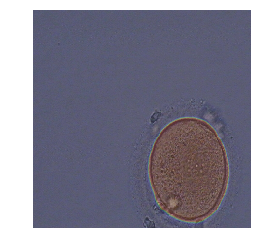

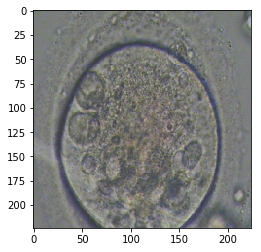

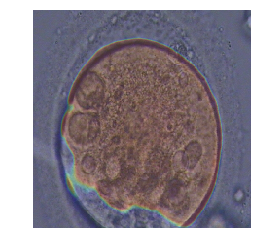

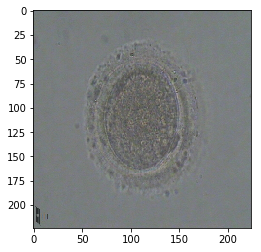

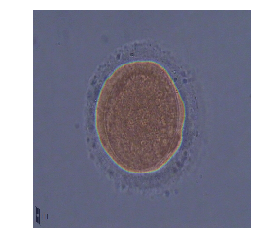

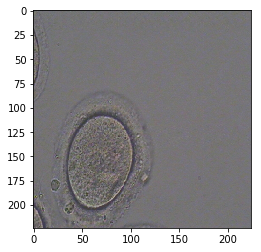

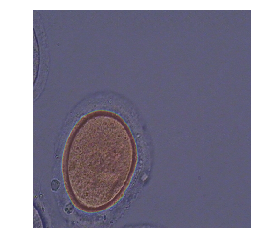

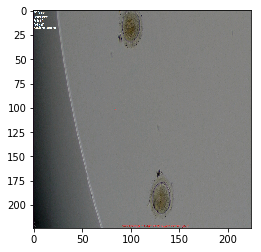

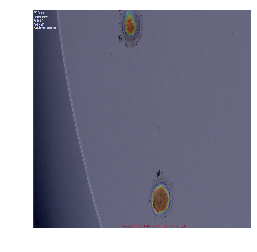

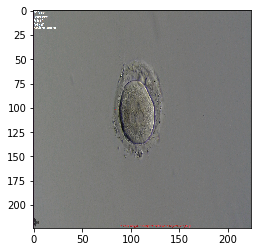

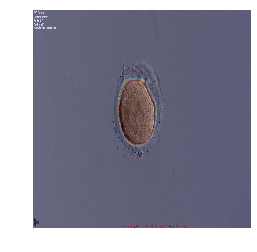

In [8]:
visualize_segmenter(model, dataloaders['val'], device)

In [9]:
results = score_segmenter(model, dataloaders, device)
print(results)

(0.8901153080201437, 0.14163090128755365)


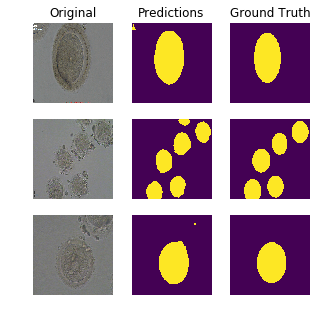

In [10]:
visualize_counting_errors(model, dataloaders['val'], device, 3)